In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
exams=pd.read_csv('exams.csv')

In [4]:
exams

,gender,race_ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,total
0,female,group B,bachelor's degree,standard,none,72,72,74,NaN
1,female,group C,some college,standard,completed,69,90,88,NaN
2,female,group B,master's degree,standard,none,90,95,93,NaN
3,male,group A,associate's degree,free/reduced,none,47,57,44,NaN
4,male,group C,some college,standard,none,76,78,75,NaN
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,NaN
996,male,group C,high school,free/reduced,none,62,55,55,NaN
997,female,group C,high school,free/reduced,completed,59,71,65,NaN
998,female,group D,some college,standard,completed,68,78,77,NaN


In [5]:
exams['total'] = exams['math'] + exams['reading'] + exams['writing']

In [6]:
exams.head(2)

,gender,race_ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [7]:
exams['cummulative'] = round(exams['total'] / 3, 2)

In [8]:
exams.head(2)

,gender,race_ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,total,cummulative
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


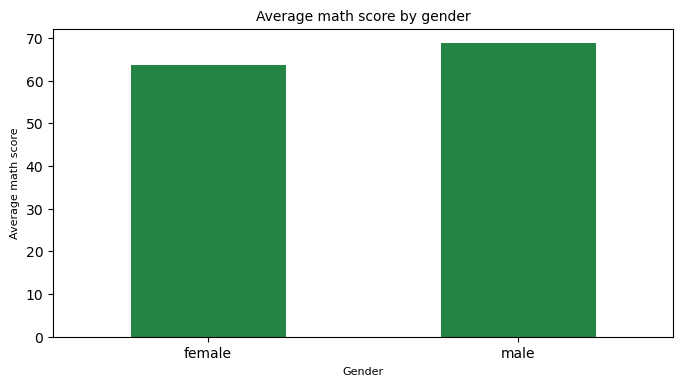

In [9]:
# what is the avg math score by gender
#method 1
plt.figure(figsize=(8,4)) #width by height
exams.groupby ('gender')['math'].mean().plot(kind='bar',color ='#238443')
plt.title('Average math score by gender',fontsize=10)# default is 12
plt.xlabel('Gender',fontsize = 8)
plt.ylabel('Average math score',fontsize = 8)
plt.xticks(rotation=0);

In [10]:
exams.groupby('gender')['math'].mean().index

Index(['female', 'male'], dtype='object', name='gender')

In [11]:
exams.groupby('gender')['math'].mean().values

array([63.63320463, 68.72821577])

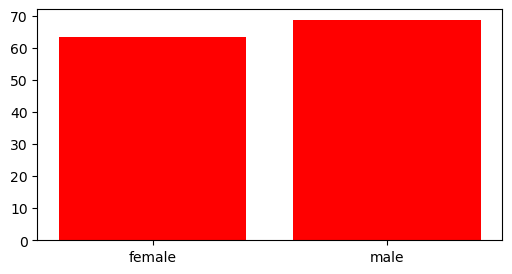

In [12]:
plt.figure(figsize = (6,3))
plt.bar(x=exams.groupby('gender')['math'].mean().index,
        height=exams.groupby('gender')['math'].mean().values,
        color='r');

In [13]:
exams.groupby('test_prep_course')['cummulative'].mean()

test_prep_course
completed    72.669469
none         65.038801
Name: cummulative, dtype: float64

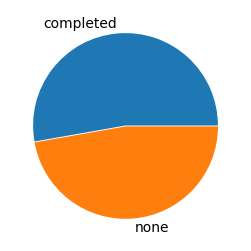

In [14]:
plt.figure(figsize=(6,3))
plt.pie(x=exams.groupby('test_prep_course')['cummulative'].mean().values,
        explode=[0.0,0.01],
        labels=exams.groupby('test_prep_course')['cummulative'].mean().index); color=['Green','red'],

In [15]:
import seaborn as sns 

In [16]:
exams.groupby('gender')['math'].mean()

gender
female    63.633205
male      68.728216
Name: math, dtype: float64

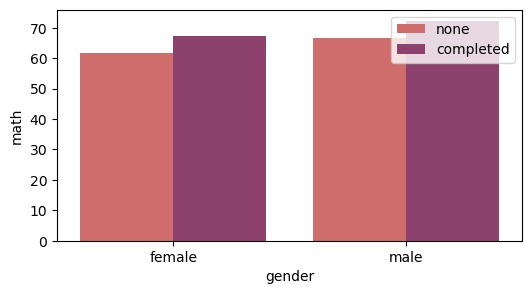

In [17]:
plt.figure(figsize=(6,3))
sns.barplot(data = exams,x='gender',y='math',hue = 'test_prep_course',palette = 'flare',errorbar=None)
plt.legend(loc = 'best')